### 🟢 Minimundo 13 — Análise de Eficiência de Painéis Solares (Energia)
|  **Contexto:** Uma usina solar deseja analisar o desempenho de seus painéis com base na
temperatura e radiação solar.

**Tarefas:**
* Calcular o rendimento médio (%) por hora.
* Criar gráfico de dispersão (temperatura × potência gerada).
* Gerar mapa de calor (hora × eficiência).

**Bibliotecas:** Pandas, Seaborn e Matplotlib

**Arquivo:** `painel_solar.csv`


* Importação e dados

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

df = pd.read_csv("dados/painel_solar.csv")
df.head()


,hora,temperatura_c,radiacao_wm2,potencia_kw
0,8,24,680,3.2
1,10,28,850,3.9
2,12,32,920,4.1
3,14,34,940,4.0
4,16,31,870,3.6


* Criar coluna de eficiência (%)
* Fórmula: `Eficiência = (potência (kW) / radiação (W/m²)) * 100`


In [56]:
df["eficiencia_pct"] = df["potencia_kw"] / df["radiacao_wm2"] * 100
df


,hora,temperatura_c,radiacao_wm2,potencia_kw,eficiencia_pct
0,8,24,680,3.2,0.470588
1,10,28,850,3.9,0.458824
2,12,32,920,4.1,0.445652
3,14,34,940,4.0,0.425532
4,16,31,870,3.6,0.413793


* Rendimento médio por hora.

In [57]:
rendimento_hora = df.groupby("hora")["eficiencia_pct"].mean()
rendimento_hora

hora
8     0.470588
10    0.458824
12    0.445652
14    0.425532
16    0.413793
Name: eficiencia_pct, dtype: float64

* Gráfico de dispersão (Temperatura × Potência).

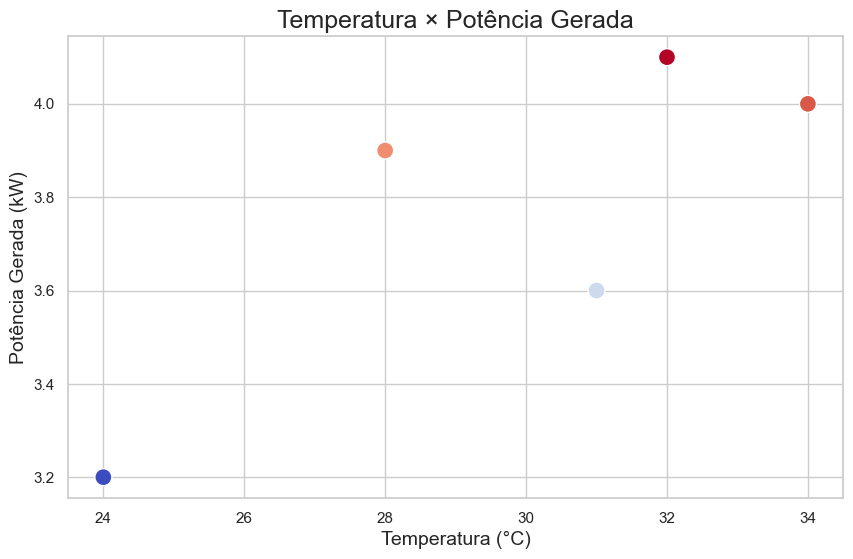

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="temperatura_c",
    y="potencia_kw",
    s=150,
    palette="coolwarm",
    hue="potencia_kw",
    legend=False
)

plt.title("Temperatura × Potência Gerada", fontsize=18)
plt.xlabel("Temperatura (°C)", fontsize=14)
plt.ylabel("Potência Gerada (kW)", fontsize=14)
plt.show()


* Mapa de calor (Hora × Eficiência)

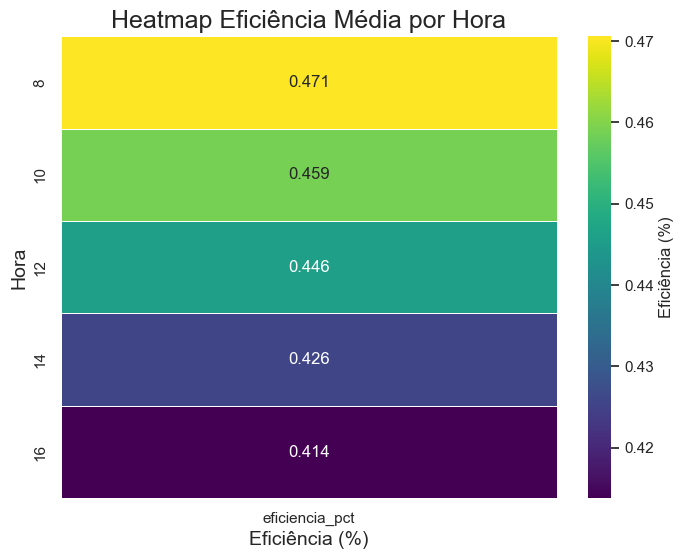

In [59]:
pivot = df.pivot_table(values="eficiencia_pct", index="hora", aggfunc="mean")

plt.figure(figsize=(8,6))
sns.heatmap(
    pivot,
    cmap="viridis",
    annot=True,
    fmt=".3f",
    linewidths=0.5,
    cbar_kws={"label": "Eficiência (%)"}
)

plt.title("Heatmap Eficiência Média por Hora", fontsize=18)
plt.ylabel("Hora", fontsize=14)
plt.xlabel("Eficiência (%)", fontsize=14)
plt.show()
